In [110]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Lars, RANSACRegressor, BayesianRidge, Ridge, LassoCV, RidgeCV, ARDRegression, HuberRegressor, QuantileRegressor, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, StackingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SMOTENC
import imblearn

plt.style.use("seaborn-v0_8")
# pd.options.display.max_columns = 100
# pd.reset_option("display.max_columns")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

In [2]:
delay_df = pd.read_csv("/mnt/dl/machine_learning_dataset/airline_on_time_statistics_and_delay_causes/DelayedFlights.csv", index_col=0)

In [3]:
delay_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
delay_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
delay_df = delay_df[delay_df["Cancelled"] == 0]
delay_df = delay_df[~pd.isna(delay_df["ArrDelay"])]

In [40]:
tail_mode = delay_df["TailNum"].mode().item()
tail_mode

'N325SW'

In [6]:
an_df = delay_df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
    'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'DepDelay', 
    'Origin', 'Dest', 'Distance', 'TaxiOut', 'ArrDelay']]

In [7]:
an_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay
0,1,3,4,2003.0,1955,WN,335,N712SW,150.0,8.0,IAD,TPA,810,8.0,-14.0
1,1,3,4,754.0,735,WN,3231,N772SW,145.0,19.0,IAD,TPA,810,10.0,2.0
2,1,3,4,628.0,620,WN,448,N428WN,90.0,8.0,IND,BWI,515,17.0,14.0
4,1,3,4,1829.0,1755,WN,3920,N464WN,90.0,34.0,IND,BWI,515,10.0,34.0
5,1,3,4,1940.0,1915,WN,378,N726SW,115.0,25.0,IND,JAX,688,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,1250.0,1220,DL,1621,N938DL,152.0,30.0,MSP,ATL,906,18.0,25.0
7009717,12,13,6,657.0,600,DL,1631,N3743H,109.0,57.0,RIC,ATL,481,34.0,75.0
7009718,12,13,6,1007.0,847,DL,1631,N909DA,143.0,80.0,ATL,IAH,689,32.0,99.0
7009726,12,13,6,1251.0,1240,DL,1639,N646DL,117.0,11.0,IAD,ATL,533,13.0,9.0


<BarContainer object of 12 artists>

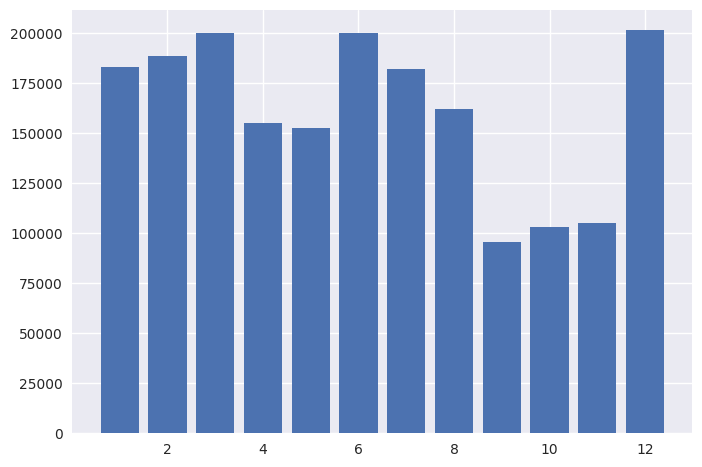

In [8]:
fig, ax = plt.subplots()
bar_values = an_df["Month"].value_counts().sort_index()
ax.bar(bar_values.index, bar_values.values)

<BarContainer object of 31 artists>

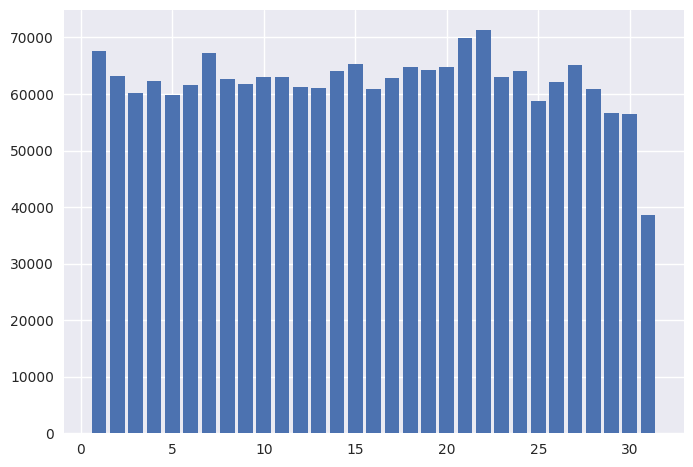

In [9]:
fig, ax = plt.subplots()
bar_values = an_df["DayofMonth"].value_counts().sort_index()
ax.bar(bar_values.index, bar_values.values)

In [10]:
an_df = delay_df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
    'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'DepDelay', 
    'Origin', 'Dest', 'Distance', 'TaxiOut', 'ArrDelay',]].copy()

In [11]:
an_df["DepTime"].sort_values().unique().astype(int)[:200]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 300, 30

In [12]:
an_df["DepTime"].sort_values().unique().astype(int)[-100:]

array([2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231,
       2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242,
       2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253,
       2254, 2255, 2256, 2257, 2258, 2259, 2300, 2301, 2302, 2303, 2304,
       2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315,
       2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326,
       2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337,
       2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348,
       2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359,
       2400])

In [13]:
def time_mapper(x):
    x = str(x)
    h, m = x[:-2], int(x[-2:])
    h = int(h) if h else 24
    return f"{h:02d}:{m:02d}"


for col in ['DepTime', 'CRSDepTime']:
    an_df[col] = an_df[col].astype(int)
    an_df[col] = an_df[col].apply(time_mapper)

In [14]:
an_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay
0,1,3,4,20:03,19:55,WN,335,N712SW,150.0,8.0,IAD,TPA,810,8.0,-14.0
1,1,3,4,07:54,07:35,WN,3231,N772SW,145.0,19.0,IAD,TPA,810,10.0,2.0
2,1,3,4,06:28,06:20,WN,448,N428WN,90.0,8.0,IND,BWI,515,17.0,14.0
4,1,3,4,18:29,17:55,WN,3920,N464WN,90.0,34.0,IND,BWI,515,10.0,34.0
5,1,3,4,19:40,19:15,WN,378,N726SW,115.0,25.0,IND,JAX,688,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,12:50,12:20,DL,1621,N938DL,152.0,30.0,MSP,ATL,906,18.0,25.0
7009717,12,13,6,06:57,06:00,DL,1631,N3743H,109.0,57.0,RIC,ATL,481,34.0,75.0
7009718,12,13,6,10:07,08:47,DL,1631,N909DA,143.0,80.0,ATL,IAH,689,32.0,99.0
7009726,12,13,6,12:51,12:40,DL,1639,N646DL,117.0,11.0,IAD,ATL,533,13.0,9.0


In [15]:
dep_times_bins = sorted([i * 60 for i in range(25)])

In [16]:
dep_times_bins, len(dep_times_bins)

([0,
  60,
  120,
  180,
  240,
  300,
  360,
  420,
  480,
  540,
  600,
  660,
  720,
  780,
  840,
  900,
  960,
  1020,
  1080,
  1140,
  1200,
  1260,
  1320,
  1380,
  1440],
 25)

In [17]:
dep_times_labels = [f"{i}:00" for i in range(25)]

In [18]:
def time_bins_mapper(x):
    h, m = [int(k) for k in x.split(":")]
    h %= 24
    return h * 60 + m 

for col in ['DepTime', 'CRSDepTime']:
    an_df[col + "Conv"] = an_df[col].apply(time_bins_mapper)

In [19]:
an_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay,DepTimeConv,CRSDepTimeConv
0,1,3,4,20:03,19:55,WN,335,N712SW,150.0,8.0,IAD,TPA,810,8.0,-14.0,1203,1195
1,1,3,4,07:54,07:35,WN,3231,N772SW,145.0,19.0,IAD,TPA,810,10.0,2.0,474,455
2,1,3,4,06:28,06:20,WN,448,N428WN,90.0,8.0,IND,BWI,515,17.0,14.0,388,380
4,1,3,4,18:29,17:55,WN,3920,N464WN,90.0,34.0,IND,BWI,515,10.0,34.0,1109,1075
5,1,3,4,19:40,19:15,WN,378,N726SW,115.0,25.0,IND,JAX,688,10.0,11.0,1180,1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,12:50,12:20,DL,1621,N938DL,152.0,30.0,MSP,ATL,906,18.0,25.0,770,740
7009717,12,13,6,06:57,06:00,DL,1631,N3743H,109.0,57.0,RIC,ATL,481,34.0,75.0,417,360
7009718,12,13,6,10:07,08:47,DL,1631,N909DA,143.0,80.0,ATL,IAH,689,32.0,99.0,607,527
7009726,12,13,6,12:51,12:40,DL,1639,N646DL,117.0,11.0,IAD,ATL,533,13.0,9.0,771,760


In [20]:
an_df["DepTimeConv"] = pd.cut(an_df["DepTimeConv"], dep_times_bins, labels=dep_times_labels[:-1], right=False)

an_df["CRSDepTimeConv"] = pd.cut(an_df["CRSDepTimeConv"], dep_times_bins, labels=dep_times_labels[:-1], right=False)

/tmp/ipykernel_17722/3249668907.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '0:00'),
 Text(1, 0, '1:00'),
 Text(2, 0, '2:00'),
 Text(3, 0, '3:00'),
 Text(4, 0, '4:00'),
 Text(5, 0, '5:00'),
 Text(6, 0, '6:00'),
 Text(7, 0, '7:00'),
 Text(8, 0, '8:00'),
 Text(9, 0, '9:00'),
 Text(10, 0, '10:00'),
 Text(11, 0, '11:00'),
 Text(12, 0, '12:00'),
 Text(13, 0, '13:00'),
 Text(14, 0, '14:00'),
 Text(15, 0, '15:00'),
 Text(16, 0, '16:00'),
 Text(17, 0, '17:00'),
 Text(18, 0, '18:00'),
 Text(19, 0, '19:00'),
 Text(20, 0, '20:00'),
 Text(21, 0, '21:00'),
 Text(22, 0, '22:00'),
 Text(23, 0, '23:00')]

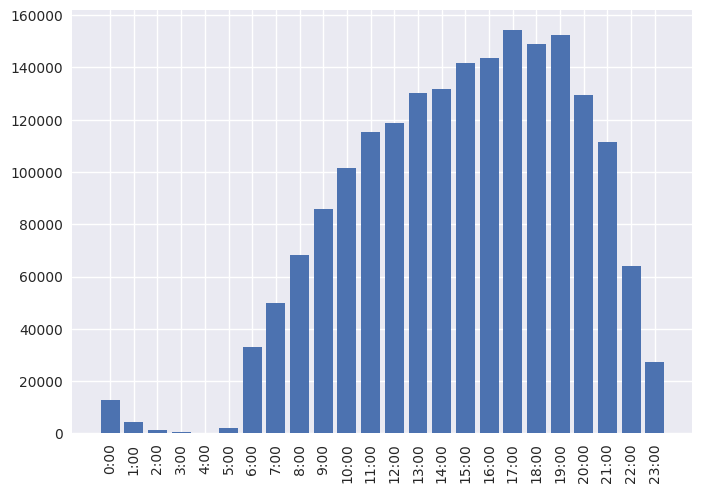

In [21]:
fig, ax = plt.subplots()
bar_values = an_df["DepTimeConv"].value_counts().sort_index()
ax.bar(bar_values.index, bar_values.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

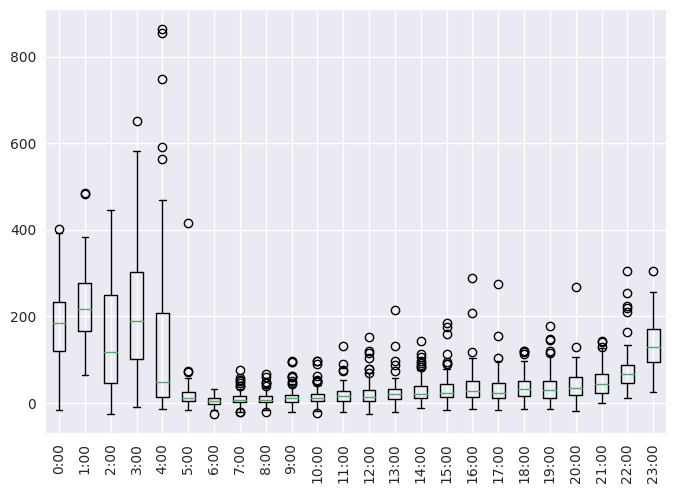

In [22]:
fig, ax = plt.subplots()
_df = an_df[["DepTimeConv", "ArrDelay"]]
gdf = _df.groupby(by=["DepTimeConv"]).apply(lambda x: x).drop(columns=["DepTimeConv"])
data = []
for level in gdf.index.levels[0]:
    data.append(gdf.loc[level].values.flatten()[:100])
ax.boxplot(data, labels=gdf.index.levels[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print()

In [23]:
an_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay,DepTimeConv,CRSDepTimeConv
0,1,3,4,20:03,19:55,WN,335,N712SW,150.0,8.0,IAD,TPA,810,8.0,-14.0,20:00,19:00
1,1,3,4,07:54,07:35,WN,3231,N772SW,145.0,19.0,IAD,TPA,810,10.0,2.0,7:00,7:00
2,1,3,4,06:28,06:20,WN,448,N428WN,90.0,8.0,IND,BWI,515,17.0,14.0,6:00,6:00
4,1,3,4,18:29,17:55,WN,3920,N464WN,90.0,34.0,IND,BWI,515,10.0,34.0,18:00,17:00
5,1,3,4,19:40,19:15,WN,378,N726SW,115.0,25.0,IND,JAX,688,10.0,11.0,19:00,19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,12:50,12:20,DL,1621,N938DL,152.0,30.0,MSP,ATL,906,18.0,25.0,12:00,12:00
7009717,12,13,6,06:57,06:00,DL,1631,N3743H,109.0,57.0,RIC,ATL,481,34.0,75.0,6:00,6:00
7009718,12,13,6,10:07,08:47,DL,1631,N909DA,143.0,80.0,ATL,IAH,689,32.0,99.0,10:00,8:00
7009726,12,13,6,12:51,12:40,DL,1639,N646DL,117.0,11.0,IAD,ATL,533,13.0,9.0,12:00,12:00


In [24]:
_df = an_df[["Origin", "Dest", "ArrDelay"]].copy()
# _df["ArrDelay"] = (_df["ArrDelay"] > 0).astype(int)
_df = _df.groupby(by=["Origin", "Dest"]).mean().reset_index()
_df["ArrDelay"] = _df["ArrDelay"].apply(lambda x: x if x > 0 else 0)
_df

,Origin,Dest,ArrDelay
0,ABE,ATL,50.405622
1,ABE,BHM,0.000000
2,ABE,CLE,52.088235
3,ABE,CLT,43.937500
4,ABE,CVG,38.666667
...,...,...,...
5122,YUM,IPL,24.830508
5123,YUM,LAS,45.480000
5124,YUM,LAX,33.397516
5125,YUM,PHX,39.978979


In [25]:
_df = pd.pivot_table(_df, index="Origin", columns=["Dest"], values=["ArrDelay"], fill_value=0).loc[:, "ArrDelay"]

In [26]:
_df

Dest,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
Origin,,,,,,,,,,,,,,,,,,,,,
ABE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YAK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


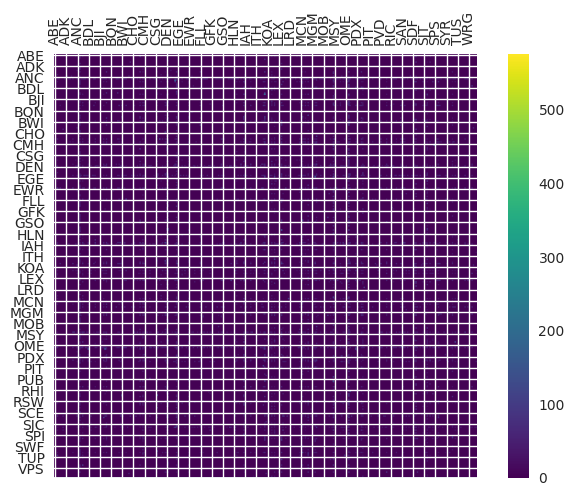

In [27]:
fig, ax = plt.subplots()
im = ax.imshow(_df.values, cmap=plt.cm.viridis, origin="upper")
fig.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(_df.columns))[::8], labels=_df.columns[::8], rotation=90)
ax.set_yticks(np.arange(len(_df.index))[::8], labels=_df.index[::8], rotation=0)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

In [28]:
an_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay,DepTimeConv,CRSDepTimeConv
0,1,3,4,20:03,19:55,WN,335,N712SW,150.0,8.0,IAD,TPA,810,8.0,-14.0,20:00,19:00
1,1,3,4,07:54,07:35,WN,3231,N772SW,145.0,19.0,IAD,TPA,810,10.0,2.0,7:00,7:00
2,1,3,4,06:28,06:20,WN,448,N428WN,90.0,8.0,IND,BWI,515,17.0,14.0,6:00,6:00
4,1,3,4,18:29,17:55,WN,3920,N464WN,90.0,34.0,IND,BWI,515,10.0,34.0,18:00,17:00
5,1,3,4,19:40,19:15,WN,378,N726SW,115.0,25.0,IND,JAX,688,10.0,11.0,19:00,19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,12:50,12:20,DL,1621,N938DL,152.0,30.0,MSP,ATL,906,18.0,25.0,12:00,12:00
7009717,12,13,6,06:57,06:00,DL,1631,N3743H,109.0,57.0,RIC,ATL,481,34.0,75.0,6:00,6:00
7009718,12,13,6,10:07,08:47,DL,1631,N909DA,143.0,80.0,ATL,IAH,689,32.0,99.0,10:00,8:00
7009726,12,13,6,12:51,12:40,DL,1639,N646DL,117.0,11.0,IAD,ATL,533,13.0,9.0,12:00,12:00


In [29]:
an_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'DepDelay',
       'Origin', 'Dest', 'Distance', 'TaxiOut', 'ArrDelay', 'DepTimeConv',
       'CRSDepTimeConv'],
      dtype='object')

In [41]:
delay_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [30]:
df = an_df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTimeConv', 'CRSDepTimeConv', 'CRSElapsedTime',
            'UniqueCarrier', 'FlightNum', 'TailNum',  'DepDelay',  'Origin', 'Dest', 'Distance', 'TaxiOut',  
            'ArrDelay']]

In [31]:
df

,Month,DayofMonth,DayOfWeek,DepTimeConv,CRSDepTimeConv,CRSElapsedTime,UniqueCarrier,FlightNum,TailNum,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay
0,1,3,4,20:00,19:00,150.0,WN,335,N712SW,8.0,IAD,TPA,810,8.0,-14.0
1,1,3,4,7:00,7:00,145.0,WN,3231,N772SW,19.0,IAD,TPA,810,10.0,2.0
2,1,3,4,6:00,6:00,90.0,WN,448,N428WN,8.0,IND,BWI,515,17.0,14.0
4,1,3,4,18:00,17:00,90.0,WN,3920,N464WN,34.0,IND,BWI,515,10.0,34.0
5,1,3,4,19:00,19:00,115.0,WN,378,N726SW,25.0,IND,JAX,688,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,12,13,6,12:00,12:00,152.0,DL,1621,N938DL,30.0,MSP,ATL,906,18.0,25.0
7009717,12,13,6,6:00,6:00,109.0,DL,1631,N3743H,57.0,RIC,ATL,481,34.0,75.0
7009718,12,13,6,10:00,8:00,143.0,DL,1631,N909DA,80.0,ATL,IAH,689,32.0,99.0
7009726,12,13,6,12:00,12:00,117.0,DL,1639,N646DL,11.0,IAD,ATL,533,13.0,9.0


In [32]:
reg_df = df.copy()

In [42]:
cat_columns = ["Month", "DayofMonth", "DayOfWeek", "DepTimeConv", "CRSDepTimeConv",
               "UniqueCarrier", "FlightNum", "TailNum", "Origin", "Dest"]
numb_columns = ["CRSElapsedTime", "DepDelay", "Distance", "TaxiOut"]
encoder = preprocessing.OrdinalEncoder()
reg_df[cat_columns] = encoder.fit_transform(reg_df[cat_columns])

In [43]:
reg_df

,Month,DayofMonth,DayOfWeek,DepTimeConv,CRSDepTimeConv,CRSElapsedTime,UniqueCarrier,FlightNum,TailNum,DepDelay,Origin,Dest,Distance,TaxiOut,ArrDelay
0,0.0,2.0,3.0,12.0,10.0,150.0,17.0,333.0,3756.0,8.0,135.0,284.0,810,8.0,-14.0
1,0.0,2.0,3.0,21.0,21.0,145.0,17.0,3226.0,4116.0,19.0,135.0,284.0,810,10.0,2.0
2,0.0,2.0,3.0,20.0,20.0,90.0,17.0,446.0,1948.0,8.0,140.0,48.0,515,17.0,14.0
4,0.0,2.0,3.0,9.0,8.0,90.0,17.0,3915.0,2129.0,34.0,140.0,48.0,515,10.0,34.0
5,0.0,2.0,3.0,10.0,10.0,115.0,17.0,376.0,3839.0,25.0,140.0,149.0,688,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,11.0,12.0,5.0,3.0,3.0,152.0,6.0,1616.0,5088.0,30.0,199.0,18.0,906,18.0,25.0
7009717,11.0,12.0,5.0,20.0,20.0,109.0,6.0,1626.0,1597.0,57.0,241.0,18.0,481,34.0,75.0
7009718,11.0,12.0,5.0,1.0,22.0,143.0,6.0,1626.0,4796.0,80.0,18.0,136.0,689,32.0,99.0
7009726,11.0,12.0,5.0,3.0,3.0,117.0,6.0,1634.0,3293.0,11.0,135.0,18.0,533,13.0,9.0


In [44]:
reg_df.isna().sum(0)

Month             0
DayofMonth        0
DayOfWeek         0
DepTimeConv       0
CRSDepTimeConv    0
CRSElapsedTime    0
UniqueCarrier     0
FlightNum         0
TailNum           3
DepDelay          0
Origin            0
Dest              0
Distance          0
TaxiOut           0
ArrDelay          0
dtype: int64

## Linear Regression

In [47]:
def get_input(df, impute):
    numb_columns = ["CRSElapsedTime", "DepDelay", "Distance", "TaxiOut"]
    cat_columns = ["Month", "DayofMonth", "DayOfWeek", "DepTimeConv", "CRSDepTimeConv",
        "UniqueCarrier", "FlightNum", "TailNum", "Origin", "Dest"]
    
    df = df.copy()
    if impute:
        df.loc[df["TailNum"].isna(), "TailNum"] = tail_mode
    y = df["ArrDelay"]
    x = df.drop(columns=["ArrDelay"])
    
    encoder = preprocessing.OrdinalEncoder()
    scaler = preprocessing.MinMaxScaler()
    normalizer = preprocessing.StandardScaler()
    
    x[cat_columns] = scaler.fit_transform(encoder.fit_transform(x[cat_columns]))
    x[numb_columns] = normalizer.fit_transform(x[numb_columns])
    
    xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.2, random_state=0)
    
    return xtrain, xvalid, ytrain, yvalid

In [93]:
def evaluate(model, x, y, plot_err=False):
    yhat = model.predict(x)
    r = r2_score(y, yhat)
    e = y - yhat
    if plot_err:
        fig, (ax1, ax2) = plt.subplots(ncols=2)

        ax1.plot(y, yhat, "o", markersize=5)
        ax1.plot([0, y.max()], [0, y.max()], 'r--')
        ax1.set(xlabel='y', ylabel='yhat')

        ax2.plot(np.arange(0, len(e)), e, "o", markersize=6)
        ax2.set(ylabel="Error")
        
        
    return r
    

In [87]:
xtrain, xvalid, ytrain, yvalid = get_input(df, True)

In [88]:
model = LinearRegression(n_jobs=2)
model.fit(xtrain, ytrain)

LinearRegression(n_jobs=2)

In [89]:
model.coef_

array([-8.47131032e-01, -1.41966519e-02, -8.58046940e-02,  4.98108666e-01,
       -6.74621813e-01, -2.04229450e+01, -2.14373357e-02, -4.77458945e-02,
        4.98225021e-01,  5.33416326e+01,  1.20368312e-01,  5.63410255e-01,
        1.78286060e+01,  1.33384168e+01])

0.9590015391650608

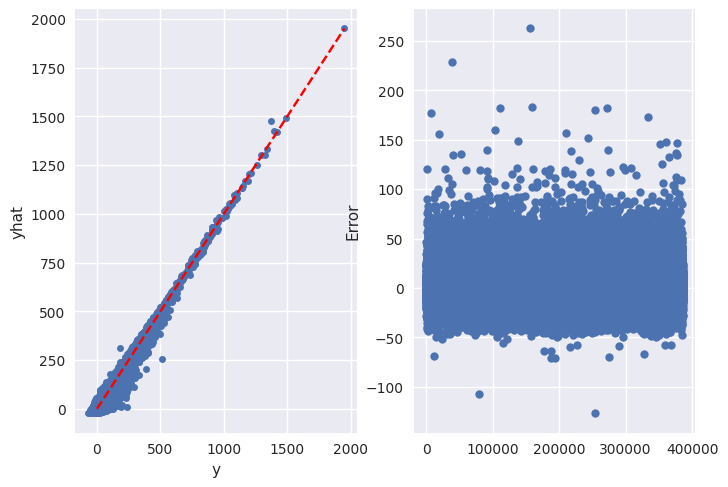

In [94]:
evaluate(model, xvalid, yvalid, plot_err=True)

In [98]:
ridge = Ridge()
model = GridSearchCV(estimator=ridge, 
                     param_grid={"alpha": np.linspace(1e-8, 1, 10)},
                     cv=KFold(4),
                     scoring=make_scorer(r2_score),
                     n_jobs=2
                     )
model.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=2,
             param_grid={'alpha': array([1.0000000e-08, 1.1111112e-01, 2.2222223e-01, 3.3333334e-01,
       4.4444445e-01, 5.5555556e-01, 6.6666667e-01, 7.7777778e-01,
       8.8888889e-01, 1.0000000e+00])},
             scoring=make_scorer(r2_score))

In [99]:
model.best_estimator_.coef_

array([-8.47128249e-01, -1.41960946e-02, -8.57973026e-02,  4.98058325e-01,
       -6.74581914e-01, -2.04221470e+01, -2.14159762e-02, -4.78033118e-02,
        4.98247638e-01,  5.33415909e+01,  1.20425767e-01,  5.63385890e-01,
        1.78278095e+01,  1.33383709e+01])

0.9590015372285299

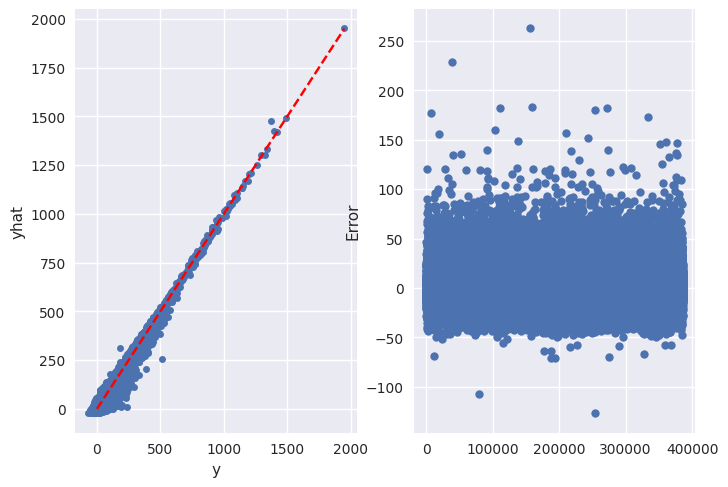

In [100]:
evaluate(model.best_estimator_, xvalid, yvalid, True)

In [101]:
ridge = RidgeCV(alphas=[1e-2, 1e-1, 1])
model = GridSearchCV(estimator=ridge, 
                     param_grid={"alphas": np.linspace(1e-8, 1, 10)},
                     cv=KFold(5),
                     scoring=make_scorer(r2_score), 
                     n_jobs=2
                     )
model.fit(xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RidgeCV(alphas=[0.01, 0.1, 1]), n_jobs=2,
             param_grid={'alphas': array([1.0000000e-08, 1.1111112e-01, 2.2222223e-01, 3.3333334e-01,
       4.4444445e-01, 5.5555556e-01, 6.6666667e-01, 7.7777778e-01,
       8.8888889e-01, 1.0000000e+00])},
             scoring=make_scorer(r2_score))

0.9590015372243395

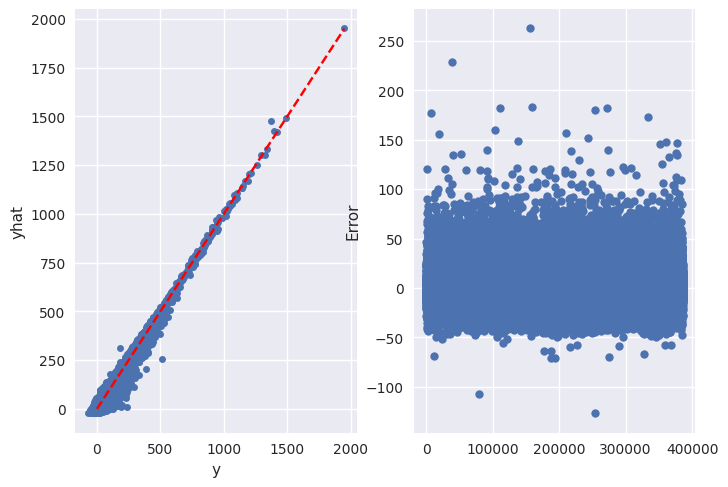

In [102]:
evaluate(model.best_estimator_, xvalid, yvalid, True)

0.9590015391624357

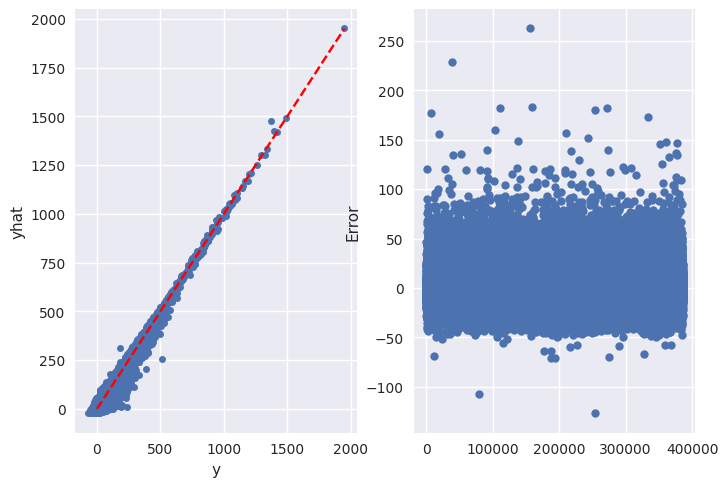

In [104]:
lasso = Lasso()
model = GridSearchCV(estimator=lasso, 
                     param_grid={"alpha": np.linspace(1e-8, 1, 10)},
                     cv=KFold(5),
                     scoring=make_scorer(r2_score), 
                     n_jobs=4
                     )
model.fit(xtrain, ytrain)
evaluate(model.best_estimator_, xvalid, yvalid, True)

/env_nlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/env_nlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/env_nlp/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/env_nlp/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/env_nlp/lib/python3.9/site-packages/sklearn/utils/_param_validatio

0.9586813304826247

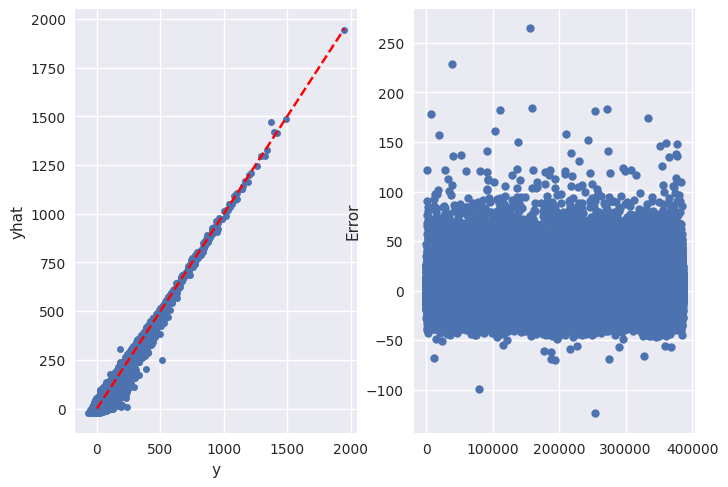

In [106]:
huber = HuberRegressor()
model = GridSearchCV(estimator=huber, 
                     param_grid={"alpha": np.linspace(1e-3, 1, 3), 
                                 "epsilon": np.linspace(0.5, 1.5, 3)},
                     cv=KFold(5),
                     scoring=make_scorer(r2_score), 
                     n_jobs=4
                     )
model.fit(xtrain, ytrain)
evaluate(model.best_estimator_, xvalid, yvalid, True)

0.9474614435401278

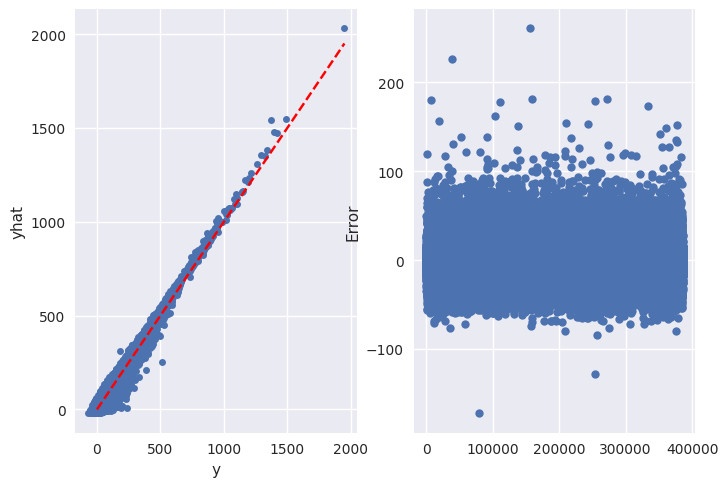

In [108]:
model = RANSACRegressor()
model.fit(xtrain, ytrain)
evaluate(model, xvalid, yvalid, True)

0.8490261544232662

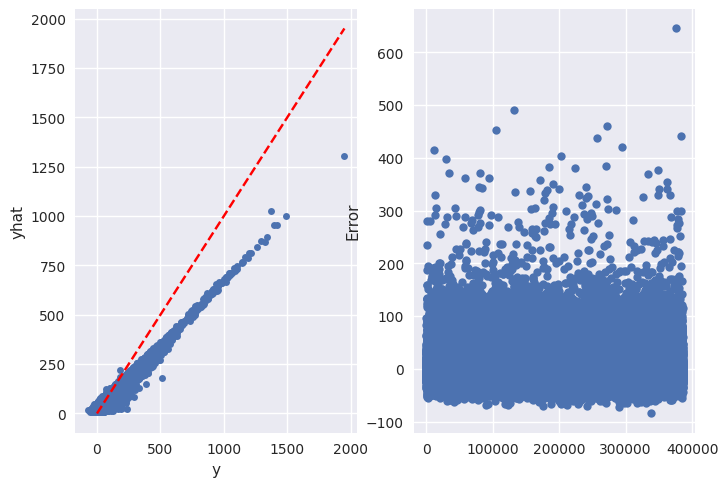

In [112]:
model = ElasticNet()
model.fit(xtrain, ytrain)
evaluate(model, xvalid, yvalid, True)

0.9590015382052297

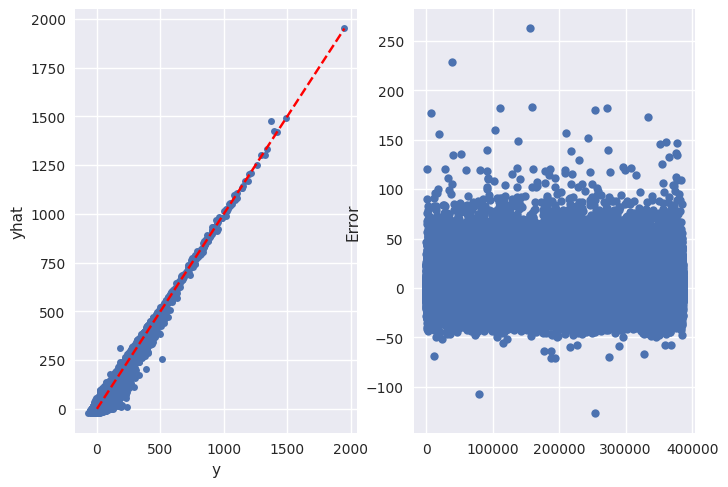

In [114]:
model = BayesianRidge()
model.fit(xtrain, ytrain)
evaluate(model, xvalid, yvalid, True)

0.959001536601837

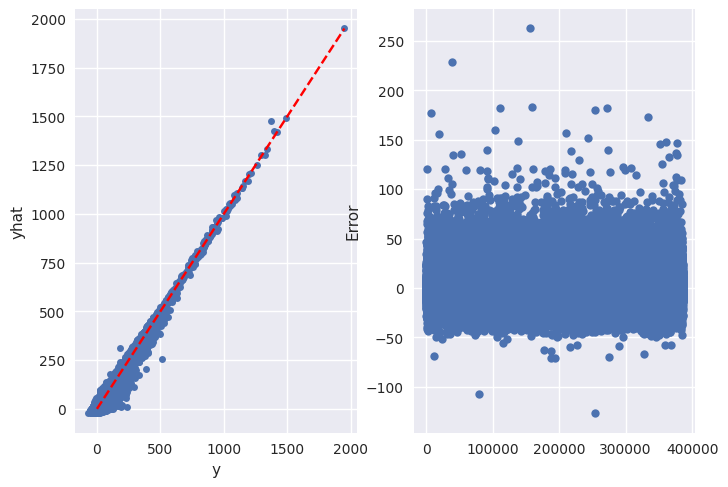

In [115]:
model = ARDRegression()
model.fit(xtrain, ytrain)
evaluate(model, xvalid, yvalid, True)

0.9537002727644468

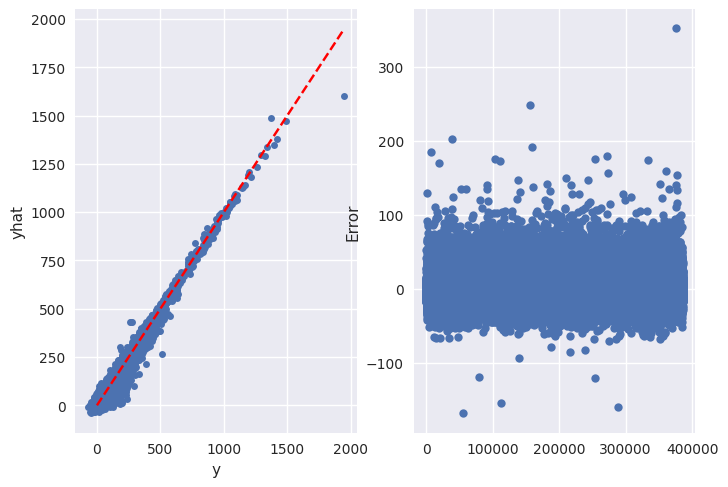

In [118]:
kneig = KNeighborsRegressor(n_jobs=5)

kneig.fit(xtrain, ytrain)
evaluate(kneig, xvalid, yvalid, True)

0.9198872567041216

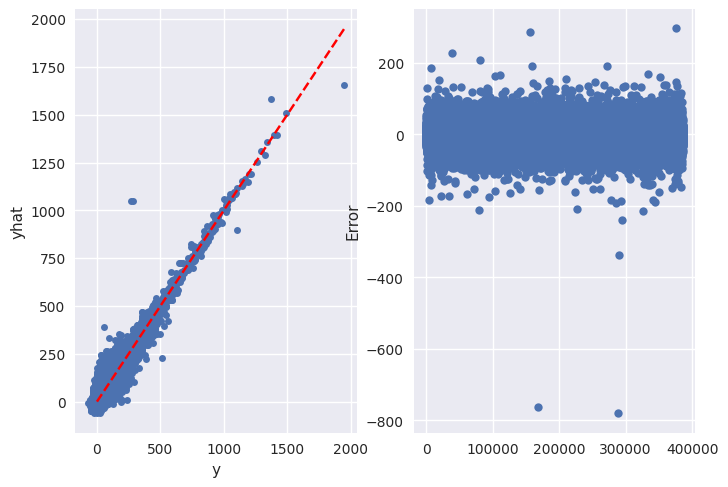

In [119]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(xtrain, ytrain)
evaluate(decision_tree, xvalid, yvalid, True)

0.5557315069923952

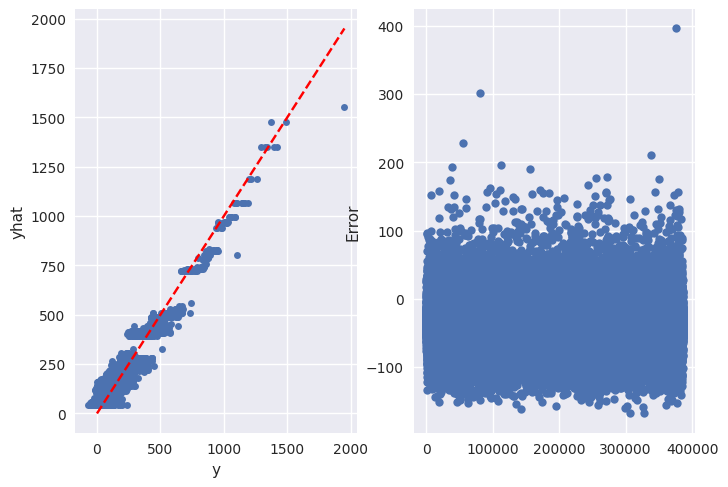

In [120]:
ada_tree = AdaBoostRegressor()
ada_tree.fit(xtrain, ytrain)
evaluate(ada_tree, xvalid, yvalid, True)

0.9589958082983281

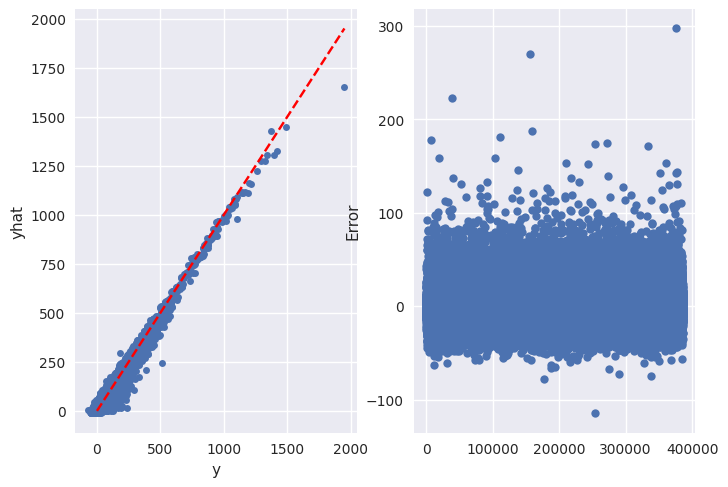

In [121]:
grad_tree = GradientBoostingRegressor()
grad_tree.fit(xtrain, ytrain)
evaluate(grad_tree, xvalid, yvalid, True)